In [ ]:
# import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Instead of sklearn.datasets import sklearn.datasets as ds
from sklearn.datasets import fetch_california_housing # import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics
# Importing the California housing Dataset instead of the Boston House Price Dataset
housing = fetch_california_housing() # use fetch_california_housing to load the california housing dataset
house_price_dataset = pd.DataFrame(housing.data, columns=housing.feature_names) # convert the data to pandas dataframe
house_price_dataset['MedHouseVal'] = housing.target # add the target variable to the dataframe
#house_price_dataset = sklearn.datasets.load_boston()

In [ ]:
print(house_price_dataset)

       MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  MedHouseVal
0      8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23        4.526
1      8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22        3.585
2      7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24        3.521
3      5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25        3.413
4      3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25        3.422
...       ...       ...       ...        ...  ...       ...       ...        ...          ...
20635  1.5603      25.0  5.045455   1.133333  ...  2.560606     39.48    -121.09        0.781
20636  2.5568      18.0  6.114035   1.315789  ...  3.122807     39.49    -121.21        0.771
20637  1.7000      17.0  5.205543   1.120092  ...  2.325635     39.43    -121.22        0.923
20638  1.8672      18.0  5.329513   1.171920  ...  2.123209 

In [ ]:
house_price_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_dataset.shape

(20640, 9)

In [ ]:
# check for missing values
house_price_dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
# statistical measures of the dataset
house_price_dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# understadning the correlation between various features inthe dataset

In [ ]:
correlation = house_price_dataset.corr()

<Axes: >

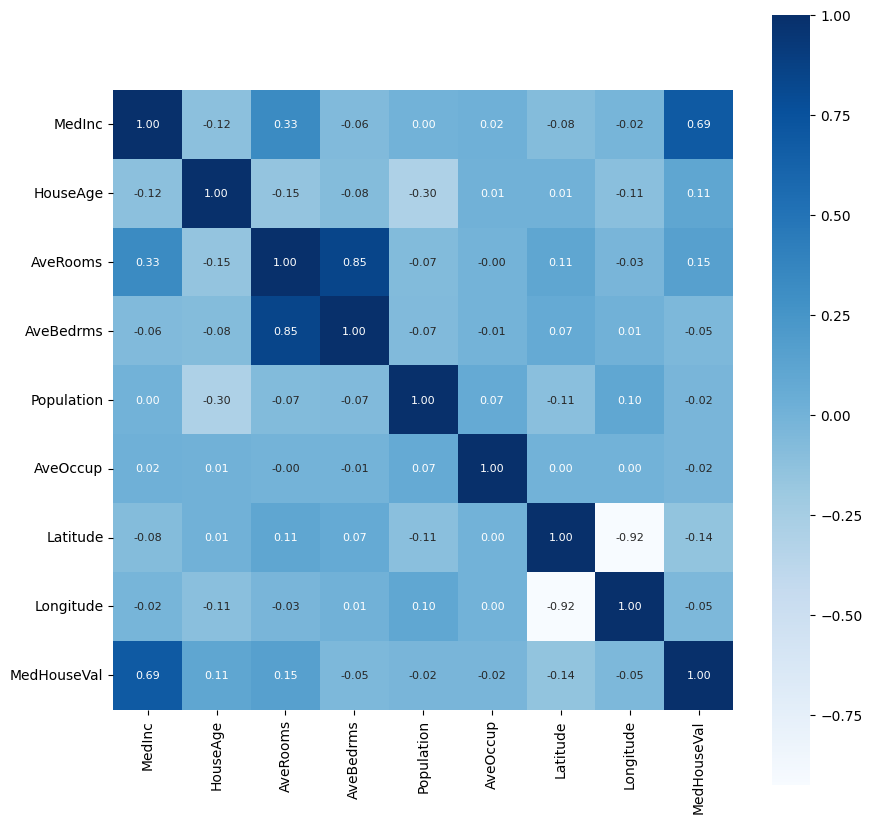

In [ ]:
# constructiong a heapmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
 X = house_price_dataset.drop(['MedHouseVal'], axis=1)
 Y = house_price_dataset['MedHouseVal']

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [ ]:
# loding hte model
model = XGBRFRegressor()

In [ ]:
# traning the model with X_train
model.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

Evaluation

prediction on training data

In [ ]:
# accuracy for drediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.76212144 3.3852074  0.8860049  ... 1.9587936  1.7352625  0.9444374 ]


In [ ]:
# R sqyared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [ ]:
print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)


R squared error :  0.723674676794855
Mean Absolute Error :  0.4384610054635124


visualizing the actyal Prices and predicted proces

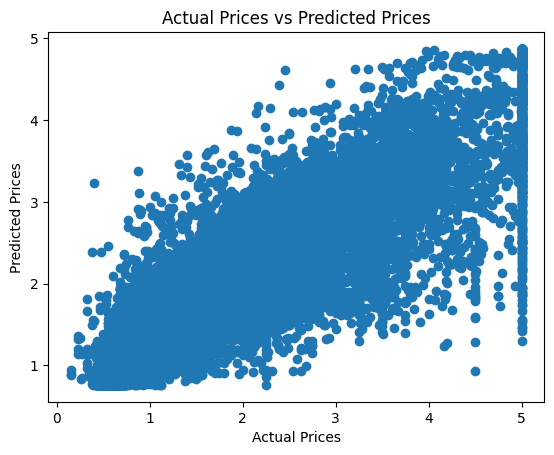

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

prediction on test data

In [ ]:
# accuracy for drediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[2.8479936 1.938483  1.3470402 ... 1.4180478 1.143073  1.8803412]


In [ ]:
# R sqyared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)


R squared error :  0.6964987095139757
Mean Absolute Error :  0.45472615940309313
